## Read in affordable housing data 

1. Canopy heights, crown area, tree density and carbon density variables have been extracted based on a buffer zone around each subsidy building location in the previous step.



## 2. What variables do we want to examine?

- boro **
- neighborhood?
- subsidy program **
- category? land and financing / tax incentive
- scale
- %AMI **


## What about response variables?

Canopy Height / Carbon Density
Asessed Value / num units

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt # an interface to define how plot behaves / looks
plt.style.use('ggplot')
import seaborn as sns




In [3]:
# Read in affordable housing data (contains both subsidies and unsubsidized)
data = pd.read_csv("../data/L1/affordable_housing_with_tree_data_nodupes.csv", low_memory=False)
#1. Filter for variables of interest

data = data.drop(["Unnamed: 0"], axis = 1)

data.loc[:, 'Value Per Unit'].replace(0, np.nan, inplace = True)

data.columns

Index(['loc', 'bbl', 'subsidy_program_full', 'Value Per Unit', 'boro_name',
       'latitude', 'longitude', 'Max Income Restriction(%AMI)',
       'Occupancy Demographic', 'Income Designation',
       'Tree Density (normalized)', 'Canopy Cover', 'chm_min', 'chm_max',
       'chm_mean', 'chm_median', 'cd_min', 'cd_max', 'cd_mean', 'cd_median'],
      dtype='object')

(array([6.049e+03, 4.106e+03, 8.560e+02, 2.190e+02, 7.600e+01, 4.000e+01,
        2.400e+01, 9.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.67269373e-01, 5.61781175e+01, 1.12188966e+02, 1.68199814e+02,
        2.24210662e+02, 2.80221510e+02, 3.36232358e+02, 3.92243207e+02,
        4.48254055e+02, 5.04264903e+02, 5.60275751e+02, 6.16286599e+02,
        6.72297447e+02, 7.28308296e+02, 7.84319144e+02, 8.40329992e+02,
        8.96340840e+02, 9.52351688e+02, 1.00836254e+03, 1.06437338e+03,
        1.12038423e+03, 1.17639508e+03, 1.23240593e+03, 1.28841678e+03,
        1.34442763e+03, 1.40043847e+03, 1.45644932e+03, 1.51246017e+03,
        1.56847102e+03, 1.62448187e+03, 1.68049271e+03]),
 <BarContainer object of 30 artists>)

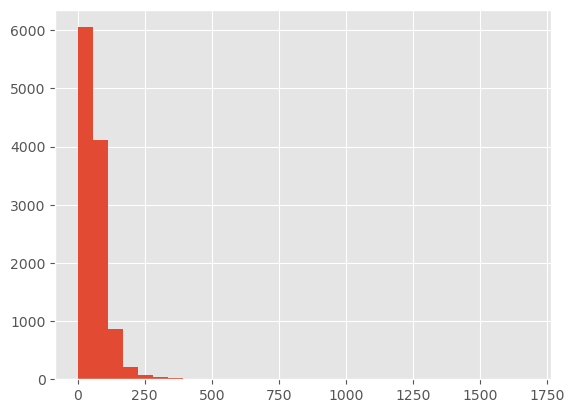

In [6]:
# histogram of assessed value per unit
plt.hist(data['Value Per Unit'].dropna()/1000, bins = 30)

#plt.hist(np.log(bbl_df['Value Per Unit'].dropna()), bins = 30)


/var/folders/0p/rh9j3dm51wn8w8hpwmkfvqkw0000gn/T/ipykernel_11773/368321966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['Log Value Per Unit'] = np.log(df_nona['Value Per Unit'])
/var/folders/0p/rh9j3dm51wn8w8hpwmkfvqkw0000gn/T/ipykernel_11773/368321966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['Value Per Unit'] = df_nona['Value Per Unit'] / 1000


Text(0.1, 0.85, 'R-squared: 0.0001')

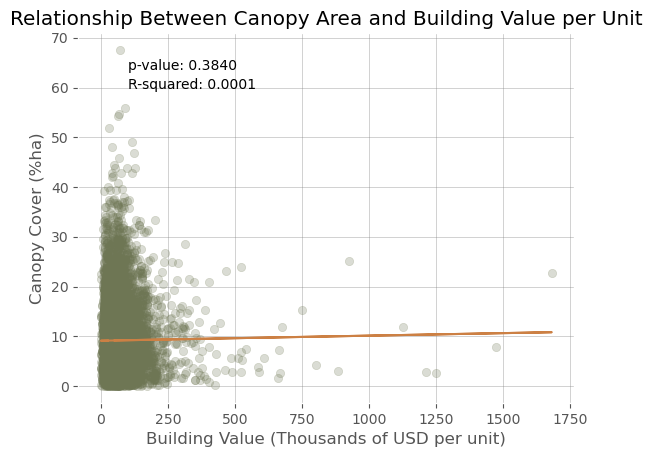

In [7]:
from scipy.stats import linregress


## Assess relationship between greenness and assessed building (bbl) value
df_nona = data.dropna()

df_nona['Log Value Per Unit'] = np.log(df_nona['Value Per Unit'])
df_nona['Value Per Unit'] = df_nona['Value Per Unit'] / 1000


# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(df_nona['Value Per Unit'], df_nona['Canopy Cover'])
regression_line = np.polyval([slope, intercept], df_nona['Value Per Unit'])

# Scatter plots
plt.scatter(x = df_nona['Value Per Unit'], y = df_nona['Canopy Cover'], color=(110/255, 118/255, 84/255), alpha = 0.25)
plt.plot(df_nona['Value Per Unit'], regression_line, color=(204/255, 128/255, 68/255))
plt.gca().set_facecolor('none')
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xlabel('Building Value (Thousands of USD per unit)')
plt.ylabel('Canopy Cover (%ha)')
plt.title('Relationship Between Canopy Area and Building Value per Unit')
# Add p-value and R-squared to the plot
plt.text(0.1, 0.9, f'p-value: {p_value:.4f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f'R-squared: {r_value**2:.4f}', transform=plt.gca().transAxes)





#### Building Value Per Unit vs Tree Density

Text(0.5, 1.0, 'Relationship Between Canopy Height and Building Value per Unit')

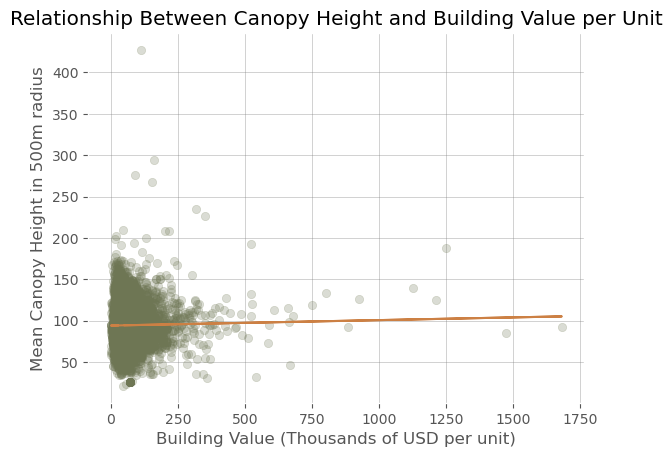

In [8]:
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(df_nona['Value Per Unit'], df_nona['chm_mean'])
regression_line = np.polyval([slope, intercept], df_nona['Value Per Unit'])

# Scatter plots
plt.scatter(x = df_nona['Value Per Unit'], y = df_nona['chm_mean'], color=(110/255, 118/255, 84/255), alpha = 0.25)
plt.plot(df_nona['Value Per Unit'], regression_line, color=(204/255, 128/255, 68/255))
plt.gca().set_facecolor('none')
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xlabel('Building Value (Thousands of USD per unit)')
plt.ylabel('Mean Canopy Height in 500m radius')
plt.title('Relationship Between Canopy Height and Building Value per Unit')

In [9]:
data['Max Income Restriction(%AMI)'] = data['Max Income Restriction(%AMI)'].str.replace("Restrictions Vary","Variable")

data['Max Income Restriction(%AMI)'] = data['Max Income Restriction(%AMI)'].str.replace("No Restrictions","None")

In [10]:
data.head()

,loc,bbl,subsidy_program_full,Value Per Unit,boro_name,latitude,longitude,Max Income Restriction(%AMI),Occupancy Demographic,Income Designation,Tree Density (normalized),Canopy Cover,chm_min,chm_max,chm_mean,chm_median,cd_min,cd_max,cd_mean,cd_median
0,80 Rutgers Slip New York City,100248007,Section 202/8,51766.513761,Manhattan,40.710802,-73.990193,50,Seniors; Persons with Disabilities,Very Low-income,-0.762475,16.04,21.0,291.0,134.764170,146.0,0.044609,239.118332,90.908876,106.167206
1,15 Bialystoker Place New York City,1003360005,Section 202/8,68058.984375,Manhattan,40.715819,-73.983302,50,Seniors; Persons with Disabilities,Very Low-income,-0.653814,21.35,21.0,318.0,112.407407,113.0,0.020505,261.449127,76.131788,83.310913
2,69 West 88 Street New York City,1012020001,Section 202/8,69558.284024,Manhattan,40.787934,-73.970605,50,Seniors; Persons with Disabilities,Very Low-income,-0.662685,12.55,21.0,347.0,104.253299,98.0,0.027345,284.721985,55.348239,50.131321
3,234 East 2 Street New York City,1003850053,Section 202/8,48930.000000,Manhattan,40.721706,-73.982095,50,Seniors; Persons with Disabilities,Very Low-income,-0.615550,17.73,21.0,242.0,94.461009,92.0,0.012957,198.564743,67.197187,64.506371
4,538 East 6 Street New York City,1004010029,Section 202/8,40050.000000,Manhattan,40.724525,-73.982304,50,Seniors; Persons with Disabilities,Very Low-income,-0.703409,27.00,21.0,237.0,118.431214,121.0,0.005765,194.421280,73.600179,65.462013


## Assess Distribitions with Boxplots - Borough

1. boro x assessed_value 
2. boro x carbon density (cd)
3. boro x canopy height (chm)

Text(0.5, 0, '')

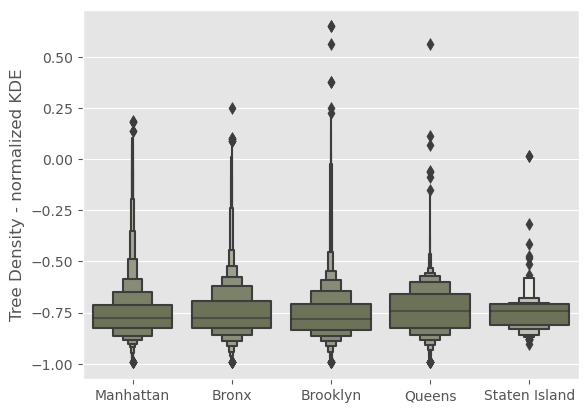

In [11]:
bp = sns.boxenplot(x="boro_name", y="Tree Density (normalized)", color=(110/255, 118/255, 84/255), data=data)
bp.set_ylabel("Tree Density - normalized KDE")
bp.set_xlabel("")

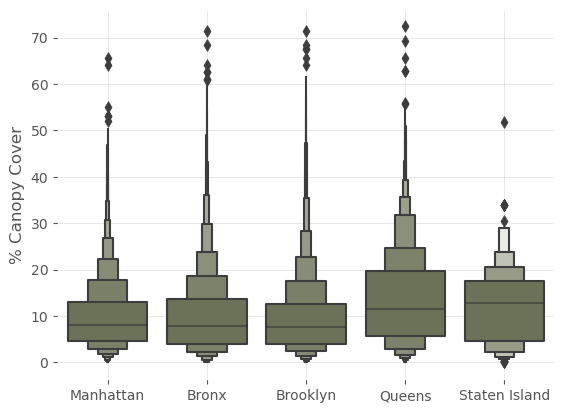

In [15]:
bp = sns.boxenplot(x="boro_name", y="Canopy Cover", color=(110/255, 118/255, 84/255), data=data)
bp.set_ylabel("% Canopy Cover")
bp.set_xlabel("")
bp.set_facecolor('none')
bp.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')

plt.savefig('../figs/canopycover_vs_boro_affordable_housingLevel.png', dpi = 300, bbox_inches = 'tight')

Text(0.5, 0, '')

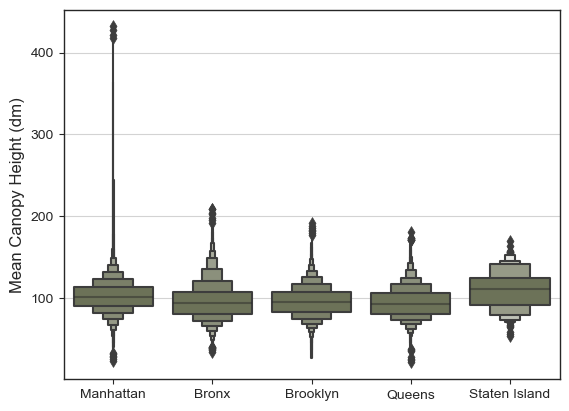

In [115]:
bp = sns.boxenplot(x="boro_name", y="chm_mean", color=(110/255, 118/255, 84/255), data=data)
bp.set_ylabel("Mean Canopy Height (dm)")
bp.set_xlabel("")

Text(0.5, 0, '')

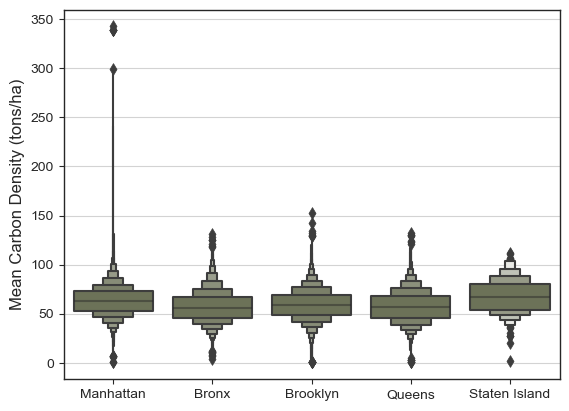

In [114]:
bp = sns.boxenplot(x="boro_name", y="cd_mean", color=(110/255, 118/255, 84/255), data=data)
bp.set_ylabel("Mean Carbon Density (tons/ha)")
bp.set_xlabel("")

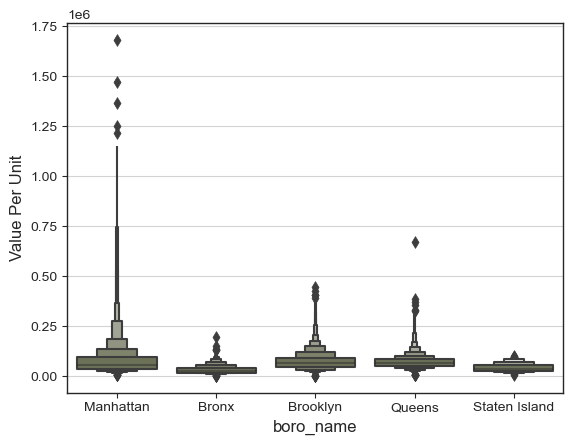

In [112]:
bp = sns.boxenplot(x="boro_name", y="Value Per Unit", color=(110/255, 118/255, 84/255), data=data)



## Income 
Income: Most programs measure household income in relation to the Area Median Income (AMI) defined annually by the Department of Housing and Urban Development (HUD). As of 2018, HUD defines the AMI for the New York City metropolitan area as $104,300 for a household of four and $73,100 for an individual. The process of determining eligibility may vary by government agency and program. While definitions of terms such as “low-income” and “moderate-income” may vary, the New York City Department of Housing and Preservation (HPD) uses the following definitions:
Extremely Low-Income: Below 30 percent of AMI
Very Low-Income: Below 50 percent of AMI
Low-Income: Below 80 percent of AMI
Moderate-Income: Below 120 percent of AMI
Middle-Income: Below 165 percent of AMI



In [ ]:
# Set grid styles
sns.set_style('white')

# Only show major y axis lines
sns.set_style('ticks', {'ytick.major.size': 10})

# Set the grid style to extend across the plot
sns.set_style({'axes.grid': True, 'grid.color': 'lightgray', 'grid.linestyle': '-', 'grid.alpha': 0.9})

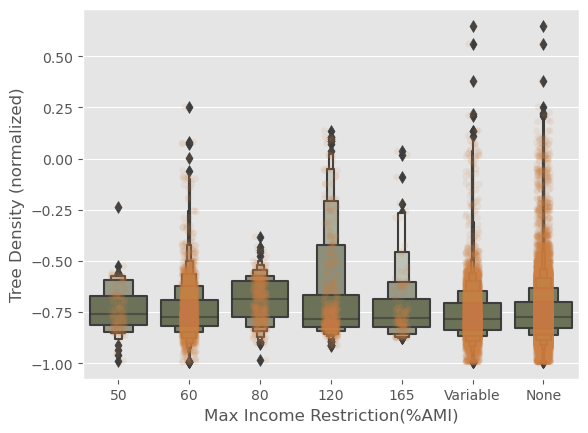

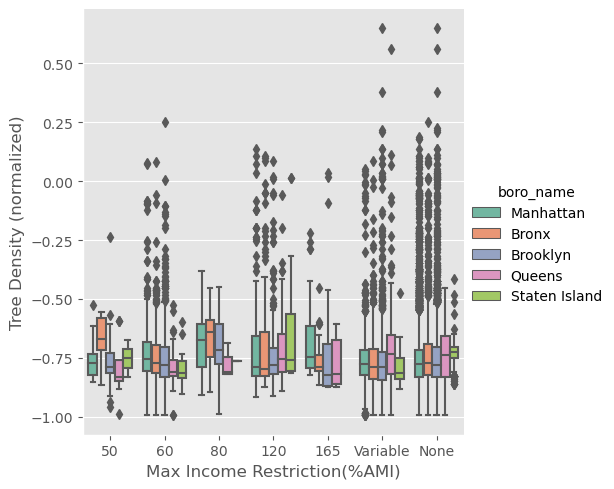

In [17]:
# Create group column that will designate the faceting for the box plots (facet by Borough)

data["group"] = data["boro_name"].astype("category")


# Find the hue order
h_order = data.groupby(by = ["Max Income Restriction(%AMI)", "boro_name"])['Tree Density (normalized)'].median().iloc[::-1].index



# Specify plot order
p_order = ["50", "60", "80", "120", "165", "Variable", "None"]

bp = sns.stripplot(x="Max Income Restriction(%AMI)", y="Tree Density (normalized)", order = p_order,data=data, color=(204/255, 128/255, 68/255), alpha = 0.10)

sns.boxenplot(x="Max Income Restriction(%AMI)", y="Tree Density (normalized)", 
                 order = p_order, color=(110/255, 118/255, 84/255), data=data)

plot = sns.catplot(x="Max Income Restriction(%AMI)", y="Tree Density (normalized)", 
                   hue="boro_name",order = p_order,kind="box", palette = sns.color_palette("Set2"),data=data)
#plot.map(sns.stripplot, x="Max Income Restriction(%AMI)", y="Tree Density (normalized)", hue="boro_name", order = p_order,jitter=True, dodge=True)



### BOXPLOTS FOR CANOPY AREA

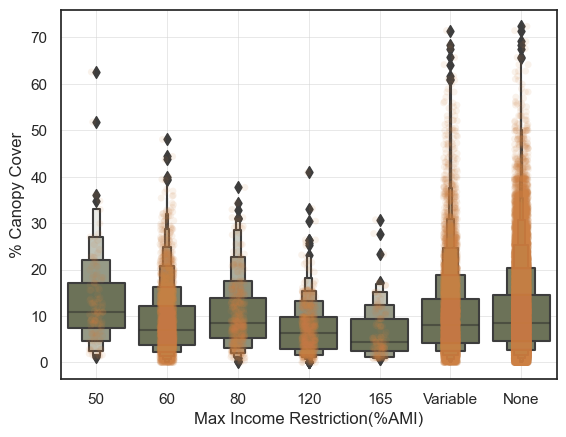

In [27]:
# Create group column that will designate the faceting for the box plots (facet by Borough)

data["group"] = data["boro_name"].astype("category")


bp = sns.stripplot(x="Max Income Restriction(%AMI)", y="Canopy Cover", order = p_order,data=data, color=(204/255, 128/255, 68/255), alpha = 0.10)

sns.boxenplot(x="Max Income Restriction(%AMI)", y="Canopy Cover", 
                 order = p_order, color=(110/255, 118/255, 84/255), data=data)
bp.set_ylabel("% Canopy Cover")

bp.set_facecolor('none')
bp.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')

plt.savefig('../figs/canopycover_vs_PercAMI_affordable_housingLevel_0.png', dpi = 300, bbox_inches = 'tight')

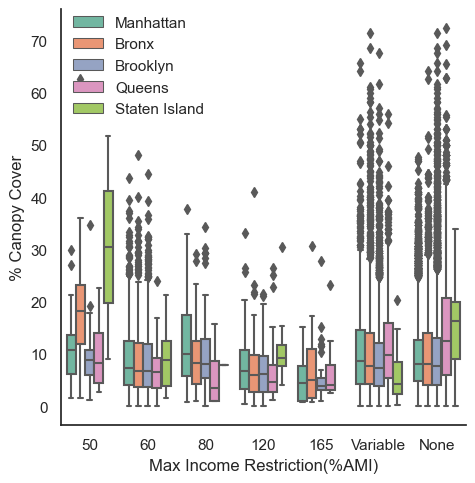

In [26]:
sns.set_theme(style='white')


plot = sns.catplot(x="Max Income Restriction(%AMI)", y="Canopy Cover", 
                   hue="boro_name",order = p_order,kind="box", 
                   palette = sns.color_palette("Set2"),legend=None, data=data)
#plot.map(sns.stripplot, x="Max Income Restriction(%AMI)", y="Tree Density (normalized)", hue="boro_name", order = p_order,jitter=True, dodge=True)
# Move the legend inside the plot
plot.add_legend(bbox_to_anchor=(0.37, 0.85), borderaxespad=0., title=None)
plot.set_axis_labels("Max Income Restriction(%AMI)", "% Canopy Cover")
plot.set()
plt.savefig('../figs/canopycover_vs_PercAMI_affordable_housingLevel.png', dpi = 300, bbox_inches = 'tight')

### BOXPLOTS FOR Carbon Density

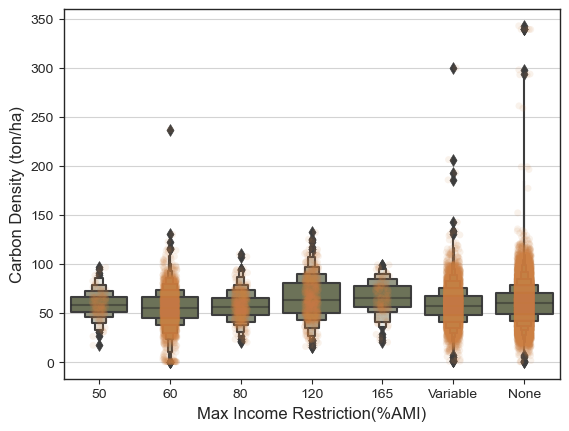

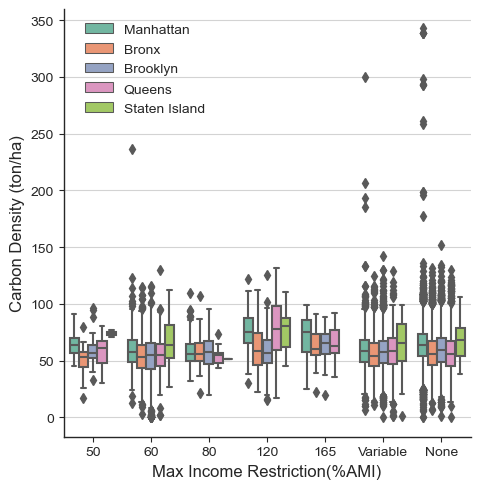

In [97]:
# Create group column that will designate the faceting for the box plots (facet by Borough)

data["group"] = data["boro_name"].astype("category")




bp = sns.boxenplot(x="Max Income Restriction(%AMI)", y="cd_mean", 
                 order = p_order, color=(110/255, 118/255, 84/255), data=data)
sns.stripplot(x="Max Income Restriction(%AMI)", y="cd_mean", order = p_order,data=data, color=(204/255, 128/255, 68/255), alpha = 0.10)
bp.set_ylabel("Carbon Density (ton/ha)")

plot = sns.catplot(x="Max Income Restriction(%AMI)", y="cd_mean", 
                   hue="boro_name",order = p_order,kind="box", 
                   palette = sns.color_palette("Set2"),legend=None, data=data)
#plot.map(sns.stripplot, x="Max Income Restriction(%AMI)", y="Tree Density (normalized)", hue="boro_name", order = p_order,jitter=True, dodge=True)
# Move the legend inside the plot
plot.add_legend(bbox_to_anchor=(0.37, 0.85), borderaxespad=0., title=None)
plot.set_axis_labels("Max Income Restriction(%AMI)", "Carbon Density (ton/ha)")

### BOXPLOTS FOR Canopy Height Model

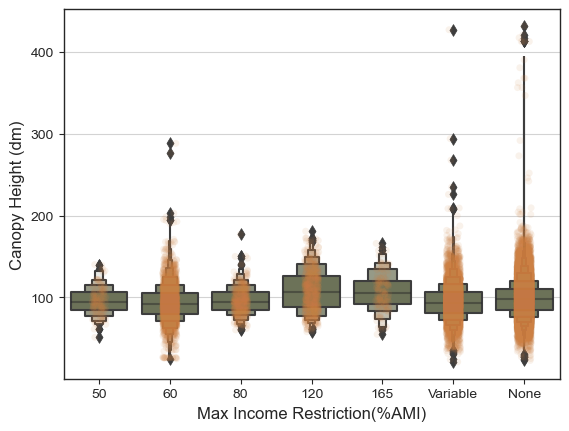

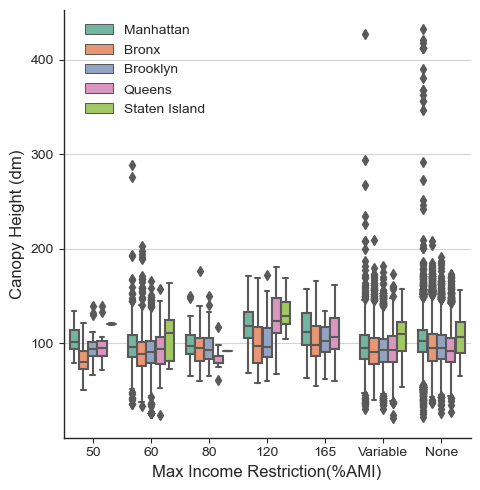

In [99]:


bp = sns.boxenplot(x="Max Income Restriction(%AMI)", y="chm_mean", 
                 order = p_order, color=(110/255, 118/255, 84/255), data=data)
sns.stripplot(x="Max Income Restriction(%AMI)", y="chm_mean", order = p_order,data=data, color=(204/255, 128/255, 68/255), alpha = 0.10)
bp.set_ylabel("Canopy Height (dm)")

plot = sns.catplot(x="Max Income Restriction(%AMI)", y="chm_mean", 
                   hue="boro_name",order = p_order,kind="box", 
                   palette = sns.color_palette("Set2"),legend=None, data=data)
#plot.map(sns.stripplot, x="Max Income Restriction(%AMI)", y="Tree Density (normalized)", hue="boro_name", order = p_order,jitter=True, dodge=True)
# Move the legend inside the plot
plot.add_legend(bbox_to_anchor=(0.37, 0.85), borderaxespad=0., title=None)
plot.set_axis_labels("Max Income Restriction(%AMI)", "Canopy Height (dm)")

## Housing Category 

NYU Furman Center organizes the subsidized housing Directory into the following _six categories:

Question: How does 'greenness' or building value vary with these categories

**Land and Financing:** These programs directly benefit from government grants or subsidies and generally include loans that are provided at below market-rate terms, direct non-refundable grants, and reduced acquisition costs of land.

**Rental Subsidies and Assistance:** These programs provide tenants or homeowners with monetary assistance to increase access to affordable housing, enable tenants to remain in their units, or improve the quality of affordable units.

**Tax Incentives:** These programs offer subsidies via tax incentives, credits, and abatements to developers and landlords. These are often reductions in property tax.

**Homeownership, Housing Stability, and Quality:** These diverse programs attempt to improve low-income homeownership rates, neighborhood stability, and the quality of the housing stock. Some programs provide counseling and social services for homeowners while others provide grants for homeowners.

**Supportive Housing:** Supportive housing programs may include funding for on-site medical services, related non-clinical services such as care coordination, and personal care services for tenants. Supportive housing serves various populations, such as formerly homeless individuals, persons with disabilities, and seniors.

**Planning and Zoning:** Although these programs are not directly housing programs, they may enable or incentivize affordable housing development through various planning and zoning tools or regulations. New York City uses urban renewal plans and zoning regulations, dictating what can be built and where, to increase the development of affordable housing throughout the city.